In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [3]:
data.shape

(7501, 20)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
hot_encoded_df = data.apply(lambda x: '|'.join(x[~x.isna()]),axis=1).to_frame()[0].str.get_dummies(sep='|')

In [6]:
hot_encoded_df.shape

(7501, 120)

## 频繁项集

In [7]:
frequent_itemsets = apriori(hot_encoded_df,min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(olive oil, spaghetti)"
100,0.025197,"(spaghetti, pancakes)"
101,0.021197,"(shrimp, spaghetti)"


## 关联规则

In [8]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=0.5)
# rules
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
8,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
10,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438
24,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
28,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349
54,(frozen smoothie),(mineral water),0.063325,0.238368,0.020264,0.320000,1.342461,0.005169,1.120047
58,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
68,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
70,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
72,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585


## 词云

In [9]:
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    cut_text = word_tokenize(f)
    # print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

根据词频，开始生成词云!


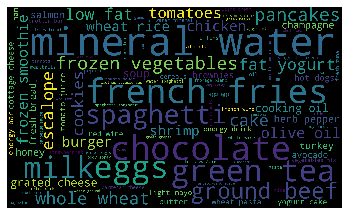

In [10]:
all_word = ''
for i,items in data.to_dict(orient='series').items():
    all_word += ' '.join(items[~items.isna()])
create_word_cloud(all_word)

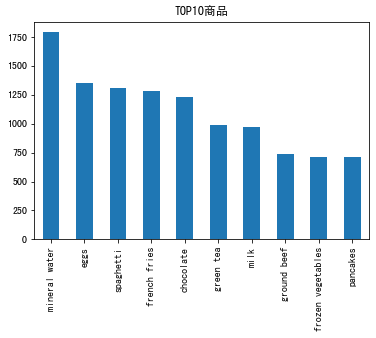

In [11]:
hot_encoded_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('TOP10商品')
plt.show()